# Generating plots for the paper, using the data from the experiments

In [1]:
import os
import numpy as np
import infrastructure as inf


def list_dir_recursive(path):
    files = []
    for dirpath, _, filenames in os.walk(path):
        for f in filenames:
            if f.endswith(".npy"):
                files.append(os.path.join(dirpath, f))
    return files

# read in all the files ending on .npy in the directory: 
dir_path = "./experiment_results/"
files = list_dir_recursive(dir_path)

# there are always 3 files per experiment ending with "_mean.npy", "_min.npy" and "_max.npy"
# read them in and store them as a triplet in a dictionary

experiments = {}
for f in files:
    if f.endswith("_mean.npy"):
        # read in the mean file
        mean_arr = np.load(f, allow_pickle=True).item()
        # read in the min file
        min_arr = np.load(f[:-8]+"min.npy", allow_pickle=True).item()
        # read in the max file
        max_arr = np.load(f[:-8]+"max.npy", allow_pickle=True).item()
        desc = f.split("_mean")[0].split("/")[-1]
        experiments[desc] = (mean_arr, min_arr, max_arr)


# for the key: "random_model" run remove the last 10 epochs from the tracking since it was trained for 25 epochs and others for only 15 epochs
experiments["random_model"][0]["val_acc_top1"] = experiments["random_model"][0]["val_acc_top1"][:-10]
experiments["random_model"][1]["val_acc_top1"] = experiments["random_model"][1]["val_acc_top1"][:-10]
experiments["random_model"][2]["val_acc_top1"] = experiments["random_model"][2]["val_acc_top1"][:-10]
# also do for train_loss
experiments["random_model"][0]["train_loss"] = experiments["random_model"][0]["train_loss"][:-10]
experiments["random_model"][1]["train_loss"] = experiments["random_model"][1]["train_loss"][:-10]
experiments["random_model"][2]["train_loss"] = experiments["random_model"][2]["train_loss"][:-10]


In [2]:
# find the experiment with the highest mean accuracy
max_mean = 0
max_mean_key = ""
for key in experiments.keys():
    mean = np.mean(experiments[key][0]["val_acc_top1"][-5:])
    if mean > max_mean:
        max_mean = mean
        max_mean_key = key
print("max mean: ",max_mean_key,max_mean)


# find the experiment with the highest max accuracy
max_max = 0
max_max_key = ""
for key in experiments.keys():
    max = np.mean(experiments[key][2]["val_acc_top1"][-5:])
    if max > max_max:
        max_max = max
        max_max_key = key
print("max max: ",max_max_key,max_max)

max mean:  fourier_model_num_clusters_2 64.7544
max max:  fourier_model_num_clusters_2 73.94


In [3]:
# create mean and max dict to sort the experiments: 
mean_dict = {}
max_dict = {}

for key in experiments.keys():
    mean = np.mean(experiments[key][0]["val_acc_top1"][-5:])
    max = np.mean(experiments[key][2]["val_acc_top1"][-5:])
    mean_dict[key] = mean
    max_dict[key] = max

# sort the experiments by mean and max accuracy in an descending order and print the first 5
sorted_mean = sorted(mean_dict.items(), key=lambda kv: kv[1],reverse=True)
sorted_max = sorted(max_dict.items(), key=lambda kv: kv[1],reverse=True)

print("sorted by mean: ")
for i in range(5):
    print(sorted_mean[i])
print("sorted by max: ")
for i in range(5):
    print(sorted_max[i])

sorted by mean: 
('fourier_model_num_clusters_2', 64.7544)
('euclid_model_num_clusters_2', 64.684)
('fourier_model_num_clusters_10', 64.5372)
('euclid_model_num_clusters_3', 64.3664)
('fourier_model_num_clusters_3', 64.3084)
sorted by max: 
('fourier_model_num_clusters_2', 73.94)
('euclid_model_num_clusters_3', 73.32000000000001)
('fourier_model_num_clusters_50', 72.58)
('fourier_model_num_models_20', 72.48)
('fourier_model_num_clusters_3', 72.39999999999999)


## Figure 2 - Single-filter Clustering Initialization Methods

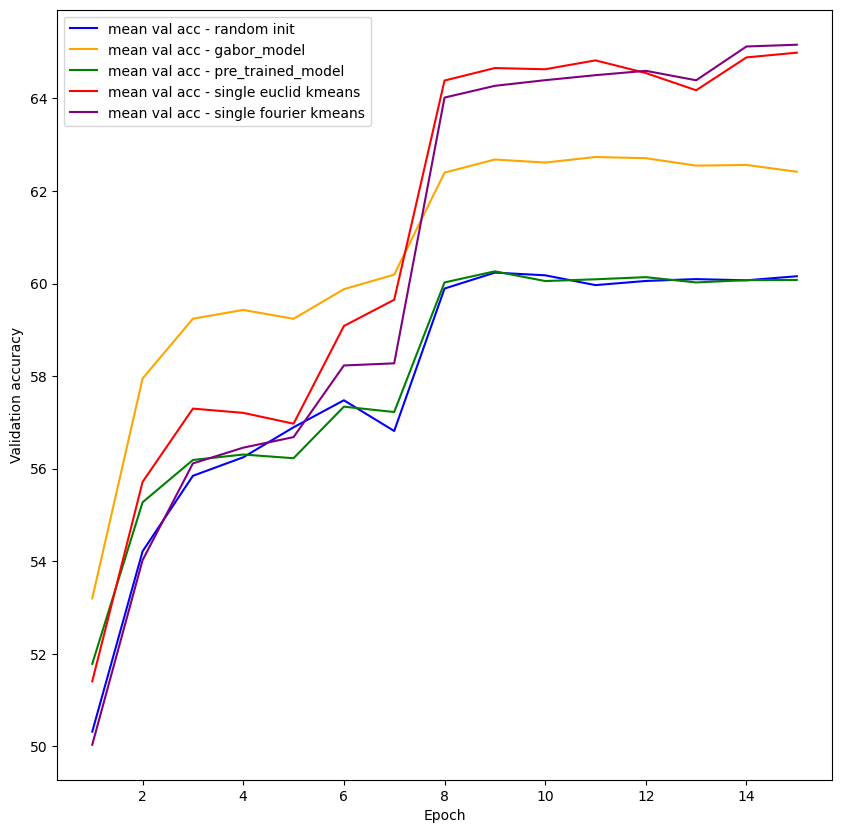

In [4]:
plot1_dict_mean = {}

plot1_dict_mean["random init"] = experiments["random_model"]
plot1_dict_mean["gabor_model"] = experiments["gabor_model_num_layers_1"]
plot1_dict_mean["pre_trained_model"] = experiments["pre_trained_model"]
plot1_dict_mean["single euclid kmeans"] = experiments["euclid_model_num_clusters_2"]
plot1_dict_mean["single fourier kmeans"] = experiments["fourier_model_num_clusters_2"]

plot_path = "./experiment_results/plots/figure2"
inf.plot_trainings_mean_min_max(plot1_dict_mean, display_train_acc=False, display_only_mean=True, save=True, save_path=plot_path, display=True, display_max_instead_of_mean=False)

## Figure 3 - Varying number of Clusters

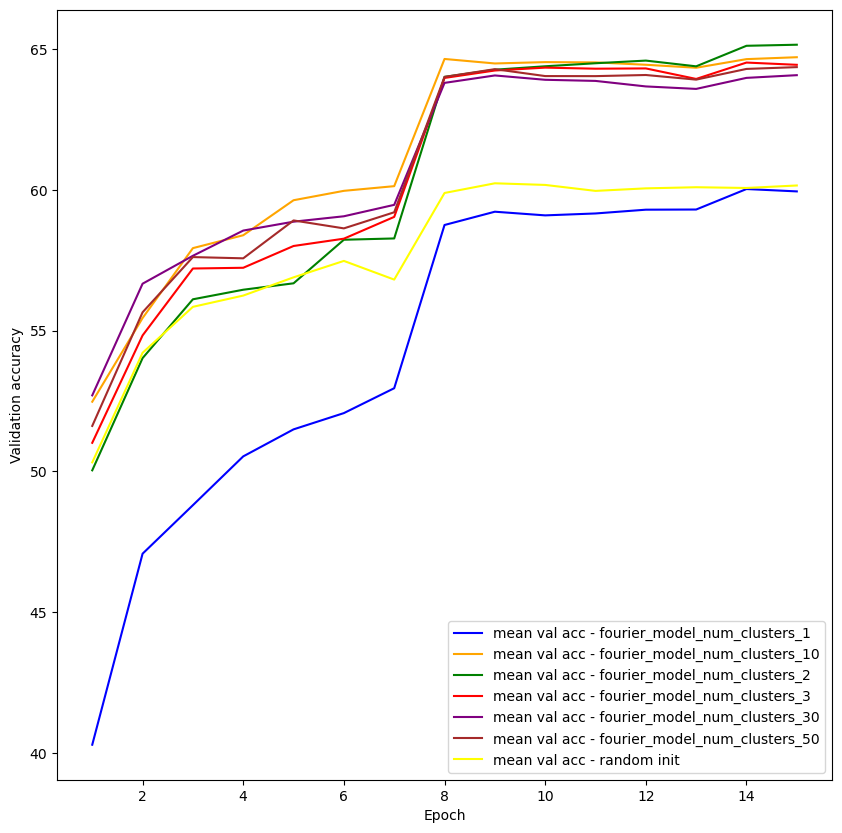

In [5]:
plot1_dict_max = {}

plot1_dict_max["fourier_model_num_clusters_1"] = experiments["fourier_model_num_clusters_1"]
plot1_dict_max["fourier_model_num_clusters_10"] = experiments["fourier_model_num_clusters_10"]
plot1_dict_max["fourier_model_num_clusters_2"] = experiments["fourier_model_num_clusters_2"]
plot1_dict_max["fourier_model_num_clusters_3"] = experiments["fourier_model_num_clusters_3"]
plot1_dict_max["fourier_model_num_clusters_30"] = experiments["fourier_model_num_clusters_30"]
plot1_dict_max["fourier_model_num_clusters_50"] = experiments["fourier_model_num_clusters_50"]
plot1_dict_max["random init"] = experiments["random_model"]

plot_path = "./experiment_results/plots/figure3"
inf.plot_trainings_mean_min_max(plot1_dict_max, display_train_acc=False, display_only_mean=True, save=True, save_path=plot_path, display=True, display_max_instead_of_mean=False)

## Figure 4 - Varying number of layers

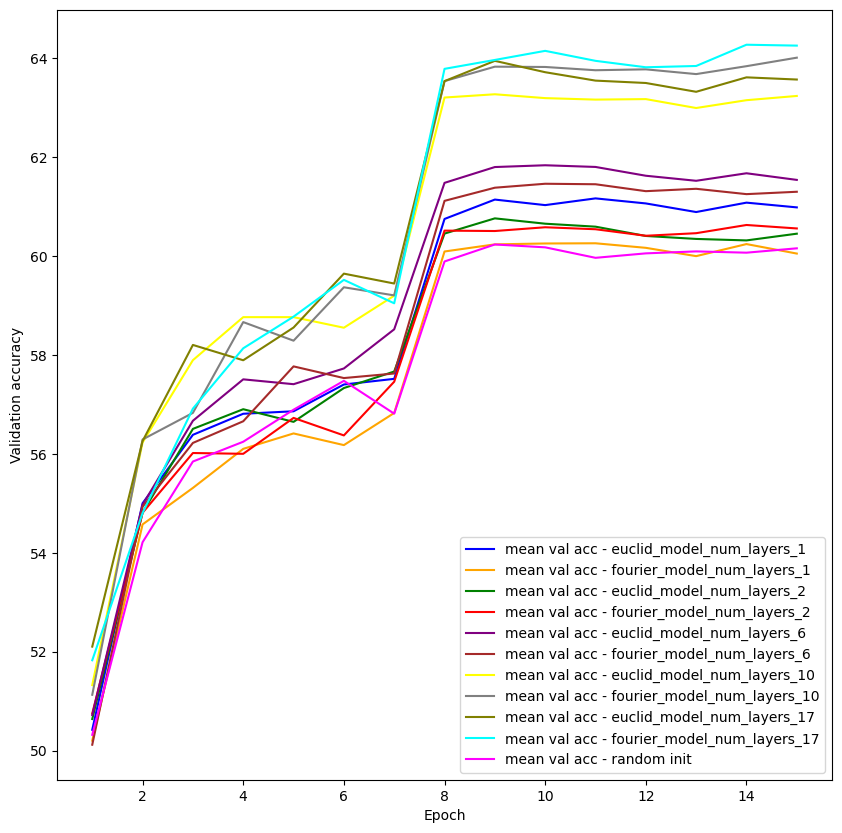

In [6]:
plot1_dict_max = {}

plot1_dict_max["euclid_model_num_layers_1"] = experiments["euclid_model_num_layers_1"]
plot1_dict_max["fourier_model_num_layers_1"] = experiments["fourier_model_num_layers_1"]
plot1_dict_max["euclid_model_num_layers_2"] = experiments["euclid_model_num_layers_2"]
plot1_dict_max["fourier_model_num_layers_2"] = experiments["fourier_model_num_layers_2"]
plot1_dict_max["euclid_model_num_layers_6"] = experiments["euclid_model_num_layers_6"]
plot1_dict_max["fourier_model_num_layers_6"] = experiments["fourier_model_num_layers_6"]
plot1_dict_max["euclid_model_num_layers_10"] = experiments["euclid_model_num_layers_10"]
plot1_dict_max["fourier_model_num_layers_10"] = experiments["fourier_model_num_layers_10"]
plot1_dict_max["euclid_model_num_layers_17"] = experiments["euclid_model_num_layers_17"]
plot1_dict_max["fourier_model_num_layers_17"] = experiments["fourier_model_num_layers_17"]
plot1_dict_max["random init"] = experiments["random_model"]

plot_path = "./experiment_results/plots/figure4"
inf.plot_trainings_mean_min_max(plot1_dict_max, display_train_acc=False, display_only_mean=True, save=True, save_path=plot_path, display=True, display_max_instead_of_mean=False)

## Figure 5 - Varying number of models

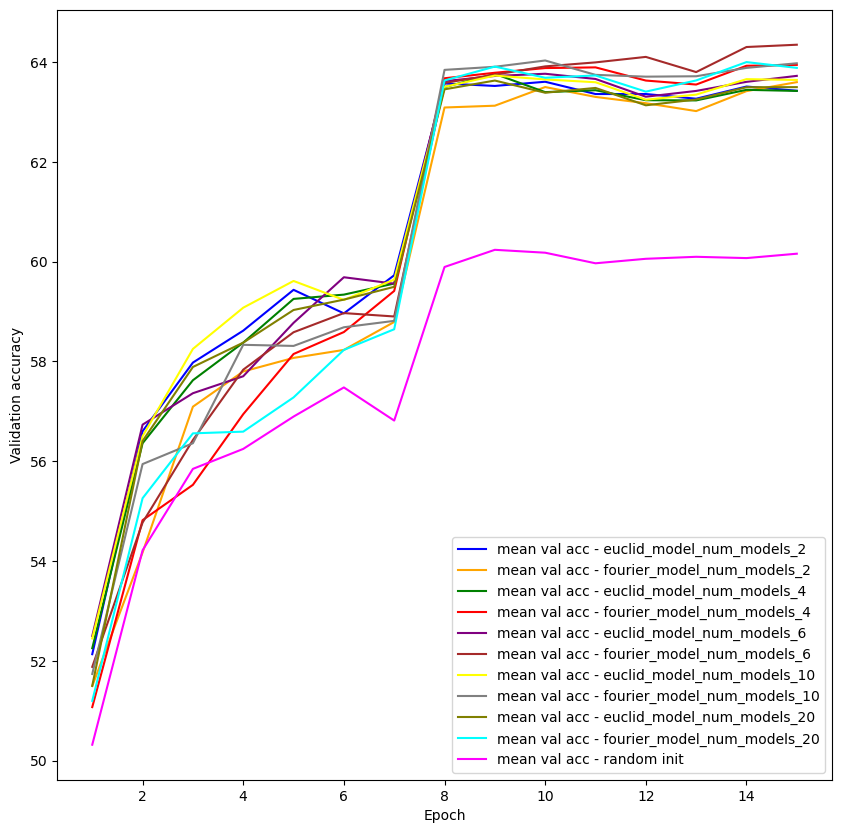

In [7]:
plot1_dict_max = {}

plot1_dict_max["euclid_model_num_models_2"] = experiments["euclid_model_num_models_2"]
plot1_dict_max["fourier_model_num_models_2"] = experiments["fourier_model_num_models_2"]
plot1_dict_max["euclid_model_num_models_4"] = experiments["euclid_model_num_models_4"]
plot1_dict_max["fourier_model_num_models_4"] = experiments["fourier_model_num_models_4"]
plot1_dict_max["euclid_model_num_models_6"] = experiments["euclid_model_num_models_6"]
plot1_dict_max["fourier_model_num_models_6"] = experiments["fourier_model_num_models_6"]
plot1_dict_max["euclid_model_num_models_10"] = experiments["euclid_model_num_models_10"]
plot1_dict_max["fourier_model_num_models_10"] = experiments["fourier_model_num_models_10"]
plot1_dict_max["euclid_model_num_models_20"] = experiments["euclid_model_num_models_20"]
plot1_dict_max["fourier_model_num_models_20"] = experiments["fourier_model_num_models_20"]
plot1_dict_max["random init"] = experiments["random_model"]

plot_path = "./experiment_results/plots/figure5"
inf.plot_trainings_mean_min_max(plot1_dict_max, display_train_acc=False, display_only_mean=True, save=True, save_path=plot_path, display=True, display_max_instead_of_mean=False)

## Figure 6 - Custom model with alignment

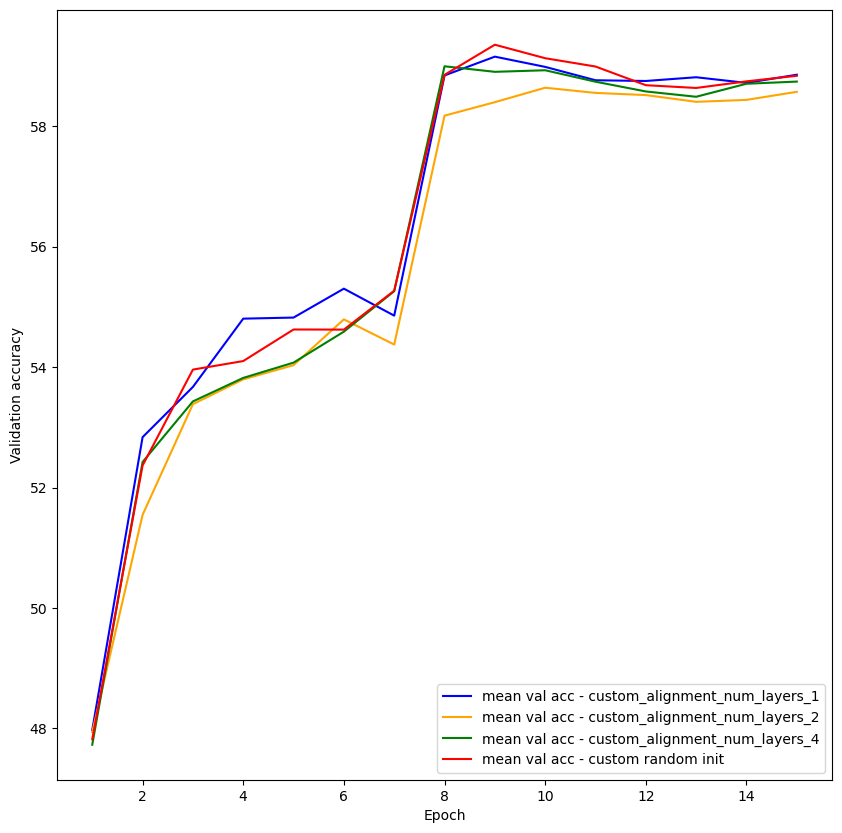

In [8]:
plot1_dict_max = {}

plot1_dict_max["custom_alignment_num_layers_1"] = experiments["custom_alignment_num_layers_1"]
plot1_dict_max["custom_alignment_num_layers_2"] = experiments["custom_alignment_num_layers_2"]
plot1_dict_max["custom_alignment_num_layers_4"] = experiments["custom_alignment_num_layers_4"]
plot1_dict_max["custom random init"] = experiments["custom_random_model"]

plot_path = "./experiment_results/plots/figure6"
inf.plot_trainings_mean_min_max(plot1_dict_max, display_train_acc=False, display_only_mean=True, save=True, save_path=plot_path, display=True, display_max_instead_of_mean=False)

## Figure 7 - Gabor varying number of layers

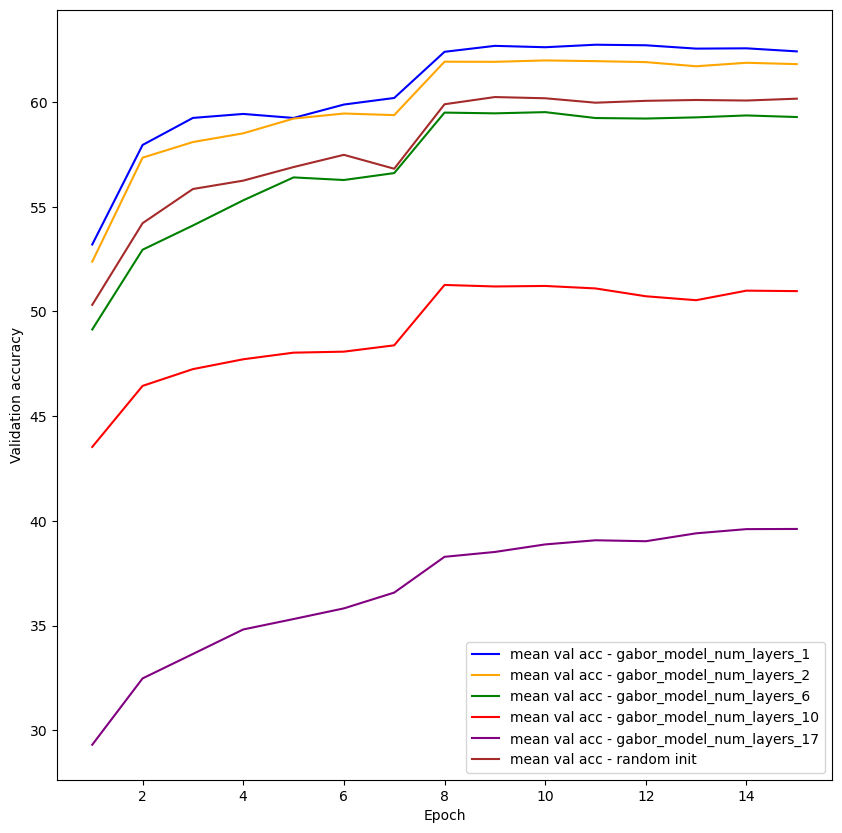

In [9]:
plot1_dict_max = {}

plot1_dict_max["gabor_model_num_layers_1"] = experiments["gabor_model_num_layers_1"]
plot1_dict_max["gabor_model_num_layers_2"] = experiments["gabor_model_num_layers_2"]
plot1_dict_max["gabor_model_num_layers_6"] = experiments["gabor_model_num_layers_6"]
plot1_dict_max["gabor_model_num_layers_10"] = experiments["gabor_model_num_layers_10"]
plot1_dict_max["gabor_model_num_layers_17"] = experiments["gabor_model_num_layers_17"]
plot1_dict_max["random init"] = experiments["random_model"]

plot_path = "./experiment_results/plots/figure7"
inf.plot_trainings_mean_min_max(plot1_dict_max, display_train_acc=False, display_only_mean=True, save=True, save_path=plot_path, display=True, display_max_instead_of_mean=False)

## Figure 8 - Compare initializing first layer

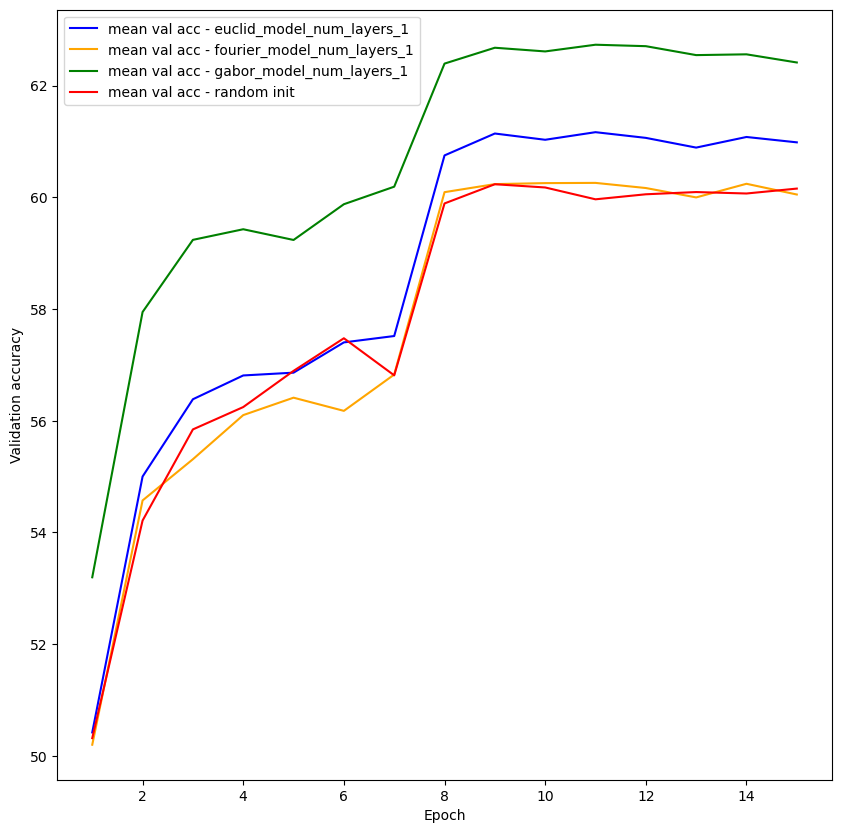

In [10]:
plot1_dict_max = {}

plot1_dict_max["euclid_model_num_layers_1"] = experiments["euclid_model_num_layers_1"]
plot1_dict_max["fourier_model_num_layers_1"] = experiments["fourier_model_num_layers_1"]
plot1_dict_max["gabor_model_num_layers_1"] = experiments["gabor_model_num_layers_1"]
plot1_dict_max["random init"] = experiments["random_model"]

plot_path = "./experiment_results/plots/figure8"
inf.plot_trainings_mean_min_max(plot1_dict_max, display_train_acc=False, display_only_mean=True, save=True, save_path=plot_path, display=True, display_max_instead_of_mean=False)

## Figure 9 - Tiny ImageNet Comparison

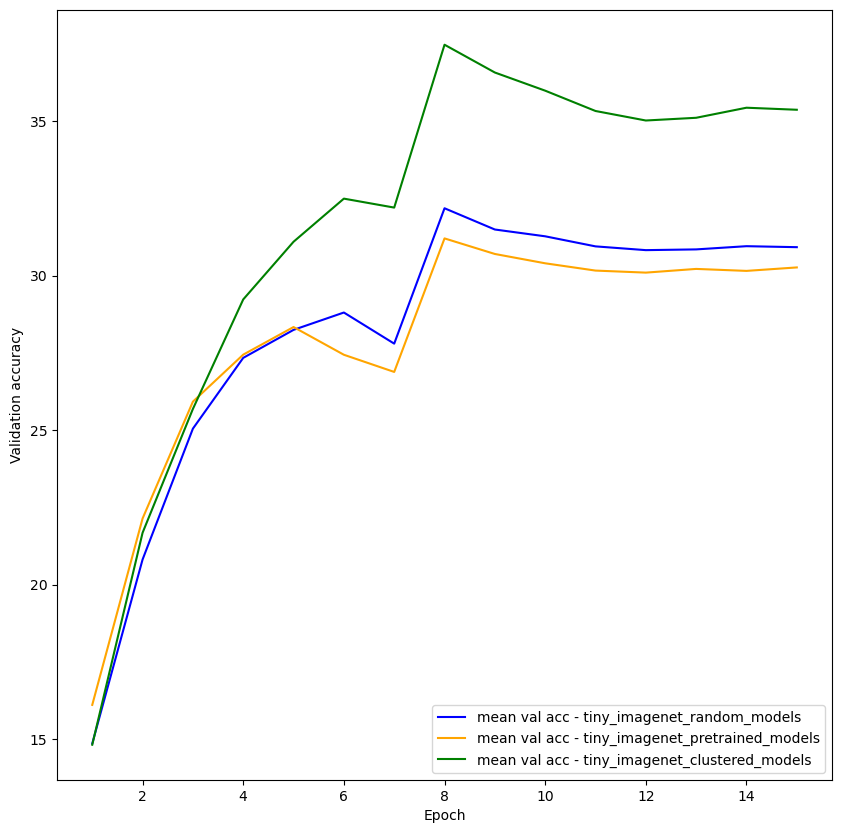

In [11]:
plot1_dict_max = {}

plot1_dict_max["tiny_imagenet_random_models"] = experiments["tiny_imagenet_random_models"]
plot1_dict_max["tiny_imagenet_pretrained_models"] = experiments["tiny_imagenet_pretrained_models"]
plot1_dict_max["tiny_imagenet_clustered_models"] = experiments["tiny_imagenet_clustered_models"]

plot_path = "./experiment_results/plots/figure9"
inf.plot_trainings_mean_min_max(plot1_dict_max, display_train_acc=False, display_only_mean=True, save=True, save_path=plot_path, display=True, display_max_instead_of_mean=False)

## Table 1 - Tiny ImageNet accuracies

In [12]:
random_accuracies = experiments["tiny_imagenet_random_models"][0]["val_acc_top1"]
pretrained_accuracies = experiments["tiny_imagenet_pretrained_models"][0]["val_acc_top1"]
clustered_accuracies = experiments["tiny_imagenet_clustered_models"][0]["val_acc_top1"]


data = [
    ["Model", "Epoch 5", "Epoch 15"],
    ["Random initialization", random_accuracies[4], random_accuracies[14]],
	["Pre-trained on CIFAR-100", pretrained_accuracies[4], pretrained_accuracies[14]],
	["Clustered initialization", clustered_accuracies[4], clustered_accuracies[14]],
]

# compute the maximum width of each column
col_widths = []

for i in range(len(data[0])):
    max_len = 0
    for row in data:
        if len(str(row[i])) > max_len:
            max_len = len(str(row[i]))
    col_widths.append(max_len)

# Print the header
header = data[0]
print(" | ".join(word.ljust(col_widths[i]) for i, word in enumerate(header)))

# Print a separator
print("-" * (sum(col_widths) + 3 * (len(col_widths) - 1)))

# Print the rows
for row in data[1:]:
    print(" | ".join(str(word).ljust(col_widths[i]) for i, word in enumerate(row)))


Model                    | Epoch 5 | Epoch 15
---------------------------------------------
Random initialization    | 28.246  | 30.924  
Pre-trained on CIFAR-100 | 28.338  | 30.268  
Clustered initialization | 31.1    | 35.374  
